In [63]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# https://076923.github.io/posts/Python-opencv-21/
def binaryImageCanny(grayImage):
    canny = cv2.Canny(grayImage, 20, 150)
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE);
    
    for contour in contours:
        cv2.drawContours(canny, [contour], 0, (255, 255, 255), -1)
       
    print(len(contours))
    return canny


In [74]:
def binaryImageAdaptiveThresh(grayImage):
    blured = cv2.medianBlur(grayImage, 5);
    thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)
    se1 = np.ones((3, 3), np.uint8)
    se2 = np.ones((5, 5), np.uint8)
    
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, se1)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, se2)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, se1)
    
    thresh = cv2.bitwise_not(thresh)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE);
    for contour in contours:
        cv2.drawContours(thresh, [contour], 0, (255, 255, 255), -1)        
    thresh = cv2.bitwise_not(thresh)

    se3 = np.ones((13, 13), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, se3)
    
    thresh = cv2.bitwise_not(thresh)
    
    return thresh

In [66]:
def resizeFixRate(image, width):
    img_width = image.shape[1]
    imgRatio = width / img_width 
    return cv2.resize(image, dsize=(0, 0), fx=imgRatio, fy=imgRatio, interpolation=cv2.INTER_LINEAR)

In [67]:
def getContours(binaryImage):
    return cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE);

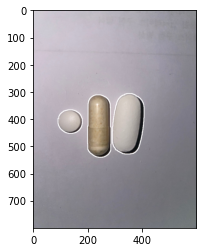

In [76]:
image = cv2.imread("images/pills_1.jpg")
image = resizeFixRate(image, 600)

# fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(fix_img)

grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binaryImage = binaryImageAdaptiveThresh(grayImage)

plt.imshow(binaryImage, cmap='gray')


contours, hirarachy = getContours(binaryImage)
for contour in contours:
    cv2.drawContours(image, [contour], 0, (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
